In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [6]:
df = pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_22.csv', low_memory=False)

### Inspeact Data

In [14]:
pd.set_option('display.max_columns', None)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [10]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [11]:
df.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

### Select Columns

In [69]:
columns = [
    'short_name',
    'player_positions',
    'overall',
    'potential',
    'nationality_name',
    'value_eur',
]
df_filtered = df[columns].copy()

In [70]:
df_filtered.head()

,short_name,player_positions,overall,potential,nationality_name,value_eur
0,L. Messi,"RW, ST, CF",93,93,Argentina,78000000.0
1,R. Lewandowski,ST,92,92,Poland,119500000.0
2,Cristiano Ronaldo,"ST, LW",91,91,Portugal,45000000.0
3,Neymar Jr,"LW, CAM",91,91,Brazil,129000000.0
4,K. De Bruyne,"CM, CAM",91,91,Belgium,125500000.0


In [71]:
%%time
df_filtered['player_positions'] = df_filtered['player_positions'].str.split(',').str[-1]

CPU times: user 362 ms, sys: 3.39 ms, total: 366 ms
Wall time: 363 ms


In [72]:
df_filtered.head()

,short_name,player_positions,overall,potential,nationality_name,value_eur
0,L. Messi,CF,93,93,Argentina,78000000.0
1,R. Lewandowski,ST,92,92,Poland,119500000.0
2,Cristiano Ronaldo,LW,91,91,Portugal,45000000.0
3,Neymar Jr,CAM,91,91,Brazil,129000000.0
4,K. De Bruyne,CAM,91,91,Belgium,125500000.0


In [73]:
df_filtered.rename(
    columns={'short_name': 'name', 'player_positions': 'position', 'nationality_name': 'nationality', 'value_eur': 'value'}, 
    inplace=True
)

In [74]:
df_filtered.position.unique()

array([' CF', 'ST', ' LW', ' CAM', 'GK', ' CM', ' ST', 'CDM', 'CB', 'LW',
       'RW', ' RB', 'CM', ' RW', 'CAM', ' LM', ' CDM', 'LB', ' CB', 'RB',
       ' RM', ' LB', 'CF', ' RWB', ' LWB', 'RWB', 'LM', 'RM', 'LWB'],
      dtype=object)

In [75]:
df_filtered.nationality.unique()

array(['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'Slovenia',
       'France', 'Germany', 'England', 'Korea Republic', 'Netherlands',
       'Senegal', 'Egypt', 'Italy', 'Spain', 'Uruguay', 'Costa Rica',
       'Norway', 'Croatia', 'Scotland', 'Algeria', 'Slovakia', 'Denmark',
       'Switzerland', 'Hungary', 'Gabon', 'Serbia', 'Nigeria', 'Morocco',
       'Sweden', 'Austria', 'Montenegro', "Côte d'Ivoire", 'Mexico',
       'Bosnia and Herzegovina', 'Finland', 'Greece', 'Armenia',
       'Colombia', 'Cameroon', 'Ghana', 'Wales', 'Russia', 'Turkey',
       'United States', 'Jamaica', 'Canada', 'Czech Republic', 'Chile',
       'Ukraine', 'Venezuela', 'Togo', 'Burkina Faso', 'Northern Ireland',
       'Congo DR', 'Israel', 'Albania', 'Guinea', 'Iceland', 'China PR',
       'New Zealand', 'Central African Republic', 'Peru', 'Mali', 'Japan',
       'North Macedonia', 'Ecuador', 'Iran', 'Republic of Ireland',
       'Angola', 'Romania', 'Mozambique', 'Cape Verde Islands',
     

In [76]:
df_filtered.isna().sum()

name            0
position        0
overall         0
potential       0
nationality     0
value          74
dtype: int64

In [77]:
df_filtered.fillna(0, inplace=True)

In [78]:
df_filtered.isna().sum()

name           0
position       0
overall        0
potential      0
nationality    0
value          0
dtype: int64

### Data Visualization

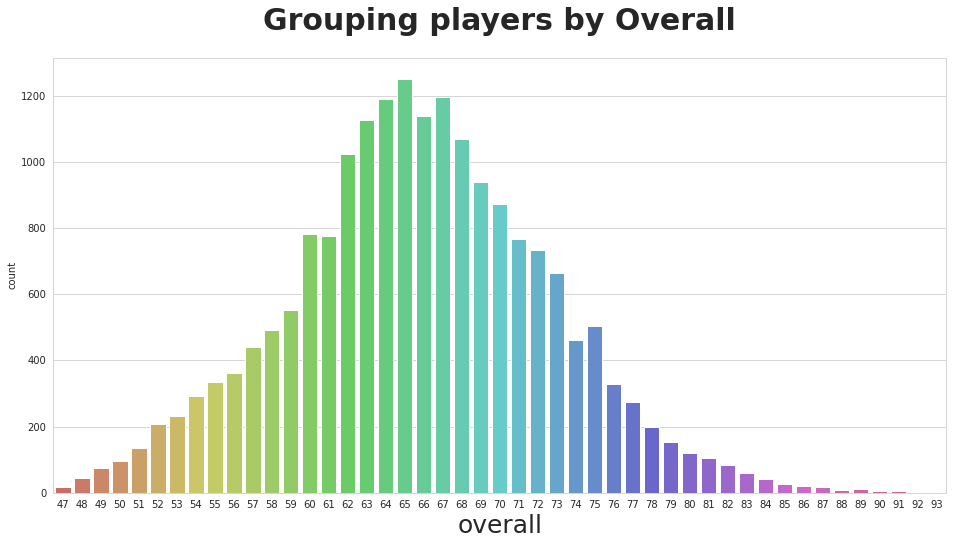

In [79]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
sns.countplot(x="overall", data=df_filtered, palette="hls");
plt.show()

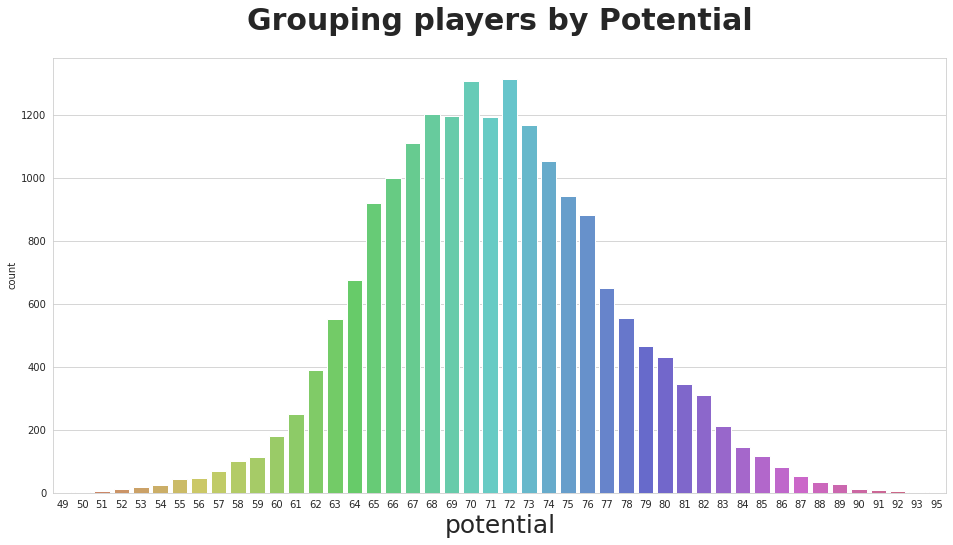

In [80]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Potential', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
sns.countplot(x="potential", data=df_filtered, palette="hls");
plt.show()

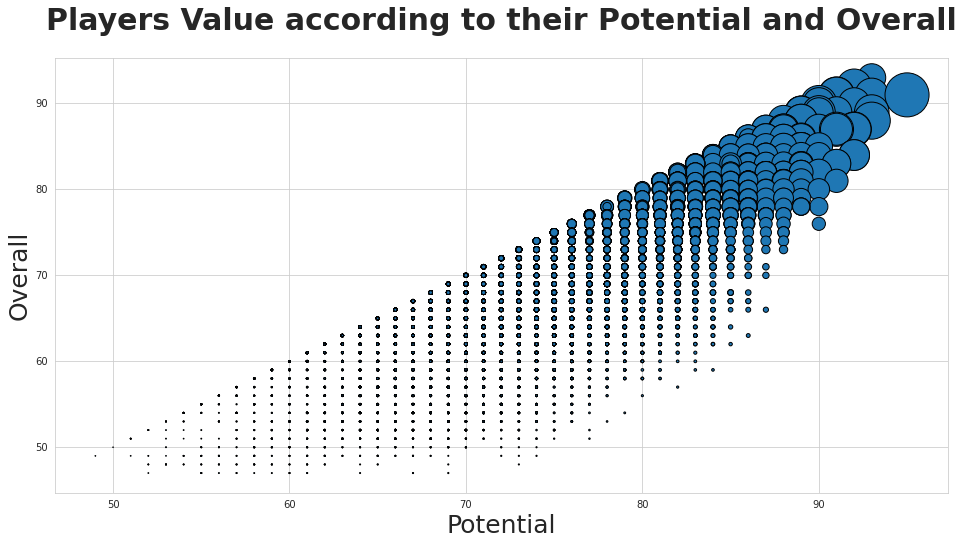

In [82]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Potential and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Potential', fontsize=25)
plt.ylabel('Overall', fontsize=25)

potential = df_filtered["potential"].values
overall = df_filtered["overall"].values
value = df_filtered["value"].values

plt.scatter(potential, overall, s = value/100000, edgecolors='black')
plt.show()

### Best Squad for the nations in Group H of 2022 World Cup
- Korea Republic
- Portugal
- Uruguay
- Ghana

In [102]:
df_filtered['overall+potential'] = (df_filtered['overall'] + df_filtered['potential']) // 2

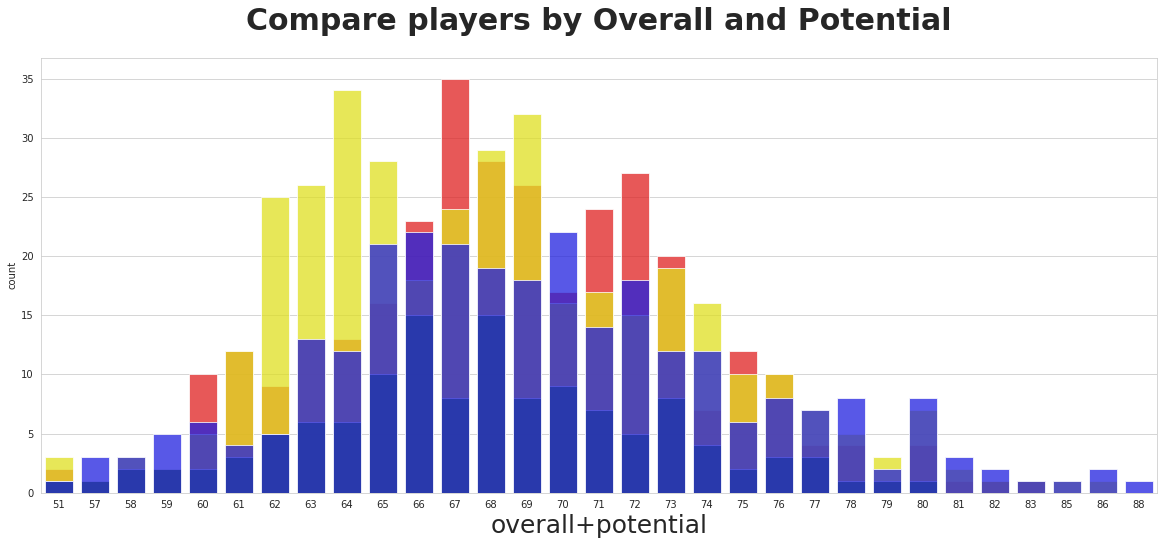

In [113]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
plt.title('Compare players by Overall and Potential', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
sns.countplot(x="overall+potential", data=df_filtered[df_filtered['nationality'] == 'Korea Republic'], color="red", alpha=0.75)
sns.countplot(x="overall+potential", data=df_filtered[df_filtered['nationality'] == 'Portugal'], color="yellow", alpha=0.75)
sns.countplot(x="overall+potential", data=df_filtered[df_filtered['nationality'] == 'Ghana'], color="green", alpha=0.75)
sns.countplot(x="overall+potential", data=df_filtered[df_filtered['nationality'] == 'Uruguay'], color="blue", alpha=0.75)
plt.show()

It seems that Uruguay and Portugals might pass the group stage. Let's start detailed analysis.

In [185]:
def get_best_squad(nationality, positions):
    df_nation = df_filtered[df_filtered.nationality == nationality].copy()
    result = []
    for pos in positions:
        idx = df_nation[ df_nation['position'].str.contains(pos)]['overall+potential'].idxmax()
        result.append(df_nation.loc[idx])
        df_nation.drop(idx, inplace=True)
    return pd.concat(result,axis=1).transpose()

In [191]:
def analyze_squad(squad):
    return squad['overall+potential'].mean()

In [189]:
# 3-4-3
formation_343 = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
# 4-3-3
formation_433 = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
# 4-4-2
formation_442 = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']

### Korea Republic

In [201]:
korea_343 = get_best_squad('Korea Republic', formation_343)
print(korea_343.to_string())
korea_343_score = analyze_squad(korea_343)
print('Average Rating: {:.2f}'.format(korea_343_score))

                name position overall potential     nationality        value overall+potential
1677    Jo Hyeon Woo       GK      75        77  Korea Republic    4700000.0                76
2339     Kim Min Jae       CB      74        81  Korea Republic    8000000.0                77
2125  Jang Hyeon Soo       CB      74        74  Korea Republic    3500000.0                74
6334      Won Du Jae       CB      69        76  Korea Republic    2600000.0                72
4756        Lee Yong       RB      70        70  Korea Republic     575000.0                70
2475   Ki Sung Yueng      CDM      73        73  Korea Republic    2400000.0                73
3375  Kwon Kyung Won      CDM      72        72  Korea Republic    2000000.0                72
4872      Kim Jin Su       LB      70        70  Korea Republic    1400000.0                70
2385      Kangin Lee       RM      74        82  Korea Republic    9500000.0                78
1794  Hwang Hee Chan       ST      75        78  K

In [202]:
korea_433 = get_best_squad('Korea Republic', formation_433)
print(korea_433.to_string())
korea_433_score = analyze_squad(korea_433)
print('Average Rating: {:.2f}'.format(korea_433_score))

                name position overall potential     nationality        value overall+potential
1677    Jo Hyeon Woo       GK      75        77  Korea Republic    4700000.0                76
4756        Lee Yong       RB      70        70  Korea Republic     575000.0                70
2339     Kim Min Jae       CB      74        81  Korea Republic    8000000.0                77
2125  Jang Hyeon Soo       CB      74        74  Korea Republic    3500000.0                74
4872      Kim Jin Su       LB      70        70  Korea Republic    1400000.0                70
2475   Ki Sung Yueng      CDM      73        73  Korea Republic    2400000.0                73
4531    Song Min Kyu      CAM      71        82  Korea Republic    4200000.0                76
1752    Lee Jae Sung      CAM      75        75  Korea Republic    5500000.0                75
2385      Kangin Lee       RM      74        82  Korea Republic    9500000.0                78
1794  Hwang Hee Chan       ST      75        78  K

In [203]:
korea_442 = get_best_squad('Korea Republic', formation_442)
print(korea_442.to_string())
korea_442_score = analyze_squad(korea_442)
print('Average Rating: {:.2f}'.format(korea_442_score))

                 name position overall potential     nationality      value overall+potential
1677     Jo Hyeon Woo       GK      75        77  Korea Republic  4700000.0                76
4756         Lee Yong       RB      70        70  Korea Republic   575000.0                70
2339      Kim Min Jae       CB      74        81  Korea Republic  8000000.0                77
2125   Jang Hyeon Soo       CB      74        74  Korea Republic  3500000.0                74
4872       Kim Jin Su       LB      70        70  Korea Republic  1400000.0                70
2385       Kangin Lee       RM      74        82  Korea Republic  9500000.0                78
2475    Ki Sung Yueng      CDM      73        73  Korea Republic  2400000.0                73
4531     Song Min Kyu      CAM      71        82  Korea Republic  4200000.0                76
1286      Hwang Ui Jo       LM      76        76  Korea Republic  7500000.0                76
1794   Hwang Hee Chan       ST      75        78  Korea Repu

In [205]:
korea_overall_score = (korea_343_score + korea_433_score + korea_442_score) / 3

In [206]:
korea_overall_score

75.18181818181819

### Portugal

In [207]:
portugal_343 = get_best_squad('Portugal', formation_343)
print(portugal_343.to_string())
portugal_343_score = analyze_squad(portugal_343)
print('Average Rating: {:.2f}'.format(portugal_343_score))

                  name position overall potential nationality        value overall+potential
205       Rui Patrício       GK      82        82    Portugal   10000000.0                82
46          Rúben Dias       CB      87        91    Portugal  102500000.0                89
199               Pepe       CB      82        82    Portugal    5500000.0                82
292         José Fonte       CB      81        81    Portugal    4600000.0                81
478      Nélson Semedo       RB      80        81    Portugal   22000000.0                80
255        Rúben Neves       CM      82        87    Portugal   46000000.0                84
260           Palhinha       CM      82        87    Portugal   41000000.0                84
62        João Cancelo       LB      86        87    Portugal   71500000.0                86
65      Bernardo Silva       RW      86        87    Portugal   80000000.0                86
198         João Félix       ST      83        91    Portugal   820000

In [208]:
portugal_433 = get_best_squad('Portugal', formation_433)
print(portugal_433.to_string())
portugal_433_score = analyze_squad(portugal_433)
print('Average Rating: {:.2f}'.format(portugal_433_score))

                  name position overall potential nationality        value overall+potential
205       Rui Patrício       GK      82        82    Portugal   10000000.0                82
478      Nélson Semedo       RB      80        81    Portugal   22000000.0                80
46          Rúben Dias       CB      87        91    Portugal  102500000.0                89
199               Pepe       CB      82        82    Portugal    5500000.0                82
62        João Cancelo       LB      86        87    Portugal   71500000.0                86
255        Rúben Neves       CM      82        87    Portugal   46000000.0                84
28     Bruno Fernandes      CAM      88        89    Portugal  107500000.0                88
260           Palhinha       CM      82        87    Portugal   41000000.0                84
65      Bernardo Silva       RW      86        87    Portugal   80000000.0                86
198         João Félix       ST      83        91    Portugal   820000

In [209]:
portugal_442 = get_best_squad('Portugal', formation_442)
print(portugal_442.to_string())
portugal_442_score = analyze_squad(portugal_442)
print('Average Rating: {:.2f}'.format(portugal_442_score))

                name position overall potential nationality        value overall+potential
205     Rui Patrício       GK      82        82    Portugal   10000000.0                82
478    Nélson Semedo       RB      80        81    Portugal   22000000.0                80
46        Rúben Dias       CB      87        91    Portugal  102500000.0                89
199             Pepe       CB      82        82    Portugal    5500000.0                82
62      João Cancelo       LB      86        87    Portugal   71500000.0                86
125  Ricardo Pereira       RM      84        84    Portugal   40500000.0                84
255      Rúben Neves       CM      82        87    Portugal   46000000.0                84
28   Bruno Fernandes      CAM      88        89    Portugal  107500000.0                88
124     R. Guerreiro       LM      84        84    Portugal   40500000.0                84
198       João Félix       ST      83        91    Portugal   82000000.0                87

In [210]:
portugal_overall_score = (portugal_343_score + portugal_433_score + portugal_442_score) / 3

In [212]:
portugal_overall_score

84.87878787878788

### Uruguay

In [213]:
uruguay_343 = get_best_squad('Uruguay', formation_343)
print(uruguay_343.to_string())
uruguay_343_score = analyze_squad(uruguay_343)
print('Average Rating: {:.2f}'.format(uruguay_343_score))

               name position overall potential nationality       value overall+potential
403      F. Muslera       GK      80        80     Uruguay   2300000.0                80
130      J. Giménez       CB      84        88     Uruguay  52000000.0                86
159       S. Coates       CB      83        83     Uruguay  30000000.0                83
1133      R. Araujo       CB      77        86     Uruguay  22000000.0                81
731       D. Suárez       RB      78        78     Uruguay   7500000.0                78
196     F. Valverde       CM      83        89     Uruguay  58000000.0                86
468     L. Torreira       CM      80        84     Uruguay  26500000.0                82
1462        M. Viña       LB      76        82     Uruguay  11000000.0                79
1429       D. Rossi       RW      76        84     Uruguay  16500000.0                80
23        L. Suárez       ST      88        88     Uruguay  44500000.0                88
840   N. De la Cruz  

In [214]:
uruguay_433 = get_best_squad('Uruguay', formation_433)
print(uruguay_433.to_string())
uruguay_433_score = analyze_squad(uruguay_433)
print('Average Rating: {:.2f}'.format(uruguay_433_score))

               name position overall potential nationality       value overall+potential
403      F. Muslera       GK      80        80     Uruguay   2300000.0                80
731       D. Suárez       RB      78        78     Uruguay   7500000.0                78
130      J. Giménez       CB      84        88     Uruguay  52000000.0                86
159       S. Coates       CB      83        83     Uruguay  30000000.0                83
1462        M. Viña       LB      76        82     Uruguay  11000000.0                79
196     F. Valverde       CM      83        89     Uruguay  58000000.0                86
468     L. Torreira       CM      80        84     Uruguay  26500000.0                82
633    M. Arambarri       CM      79        84     Uruguay  23500000.0                81
1429       D. Rossi       RW      76        84     Uruguay  16500000.0                80
23        L. Suárez       ST      88        88     Uruguay  44500000.0                88
840   N. De la Cruz  

In [215]:
uruguay_442 = get_best_squad('Uruguay', formation_442)
print(uruguay_442.to_string())
uruguay_442_score = analyze_squad(uruguay_442)
print('Average Rating: {:.2f}'.format(uruguay_442_score))

             name position overall potential nationality       value overall+potential
403    F. Muslera       GK      80        80     Uruguay   2300000.0                80
731     D. Suárez       RB      78        78     Uruguay   7500000.0                78
130    J. Giménez       CB      84        88     Uruguay  52000000.0                86
159     S. Coates       CB      83        83     Uruguay  30000000.0                83
1462      M. Viña       LB      76        82     Uruguay  11000000.0                79
1052    N. Nández       RM      77        82     Uruguay  15500000.0                79
196   F. Valverde       CM      83        89     Uruguay  58000000.0                86
468   L. Torreira       CM      80        84     Uruguay  26500000.0                82
1423   M. Olivera       LM      76        84     Uruguay  16000000.0                80
23      L. Suárez       ST      88        88     Uruguay  44500000.0                88
74      E. Cavani       ST      85        8

In [216]:
uruguay_overall_score = (uruguay_343_score + uruguay_433_score + uruguay_442_score) / 3

In [217]:
uruguay_overall_score

82.24242424242425

### Ghana

In [218]:
ghana_343 = get_best_squad('Ghana', formation_343)
print(ghana_343.to_string())
ghana_343_score = analyze_squad(ghana_343)
print('Average Rating: {:.2f}'.format(ghana_343_score))

             name position overall potential nationality       value overall+potential
2426     R. Ofori       GK      74        77       Ghana   4100000.0                75
1447    M. Salisu       CB      76        84       Ghana  15500000.0                80
1282     A. Djiku       CB      76        79       Ghana   8500000.0                77
2241     J. Aidoo       CB      74        79       Ghana   5500000.0                76
4405  L. Blessing       RB      71        75       Ghana   2700000.0                73
173     T. Partey      CDM      83        83       Ghana  36500000.0                83
1120     M. Kudus       CM      77        86       Ghana  23000000.0                81
2118    B. Rahman      LWB      74        75       Ghana   4500000.0                74
1578      J. Ayew       RM      75        75       Ghana   5500000.0                75
675    K. Boateng       CF      78        78       Ghana   6500000.0                78
4459  J. Paintsil       LM      71        7

In [219]:
ghana_433 = get_best_squad('Ghana', formation_433)
print(ghana_433.to_string())
ghana_433_score = analyze_squad(ghana_433)
print('Average Rating: {:.2f}'.format(ghana_433_score))

             name position overall potential nationality       value overall+potential
2426     R. Ofori       GK      74        77       Ghana   4100000.0                75
4405  L. Blessing       RB      71        75       Ghana   2700000.0                73
1447    M. Salisu       CB      76        84       Ghana  15500000.0                80
1282     A. Djiku       CB      76        79       Ghana   8500000.0                77
2118    B. Rahman      LWB      74        75       Ghana   4500000.0                74
173     T. Partey      CDM      83        83       Ghana  36500000.0                83
1120     M. Kudus       CM      77        86       Ghana  23000000.0                81
1292   D. Amartey      CDM      76        79       Ghana   8500000.0                77
1578      J. Ayew       RM      75        75       Ghana   5500000.0                75
675    K. Boateng       CF      78        78       Ghana   6500000.0                78
4459  J. Paintsil       LM      71        7

In [220]:
ghana_442 = get_best_squad('Ghana', formation_442)
print(ghana_442.to_string())
ghana_442_score = analyze_squad(ghana_442)
print('Average Rating: {:.2f}'.format(ghana_442_score))

             name position overall potential nationality       value overall+potential
2426     R. Ofori       GK      74        77       Ghana   4100000.0                75
4405  L. Blessing       RB      71        75       Ghana   2700000.0                73
1447    M. Salisu       CB      76        84       Ghana  15500000.0                80
1282     A. Djiku       CB      76        79       Ghana   8500000.0                77
2118    B. Rahman      LWB      74        75       Ghana   4500000.0                74
1578      J. Ayew       RM      75        75       Ghana   5500000.0                75
173     T. Partey      CDM      83        83       Ghana  36500000.0                83
1120     M. Kudus       CM      77        86       Ghana  23000000.0                81
4459  J. Paintsil       LM      71        78       Ghana   3800000.0                74
675    K. Boateng       CF      78        78       Ghana   6500000.0                78
1338   E. Boateng       ST      76        8

In [221]:
ghana_overall_score = (ghana_343_score + ghana_433_score + ghana_442_score) / 3

In [222]:
ghana_overall_score

77.0

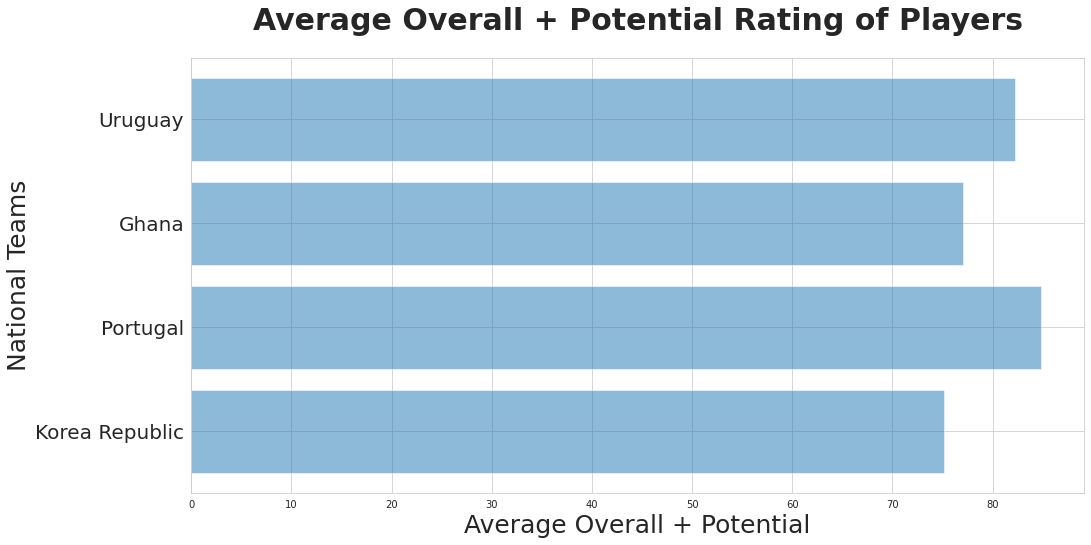

In [225]:
teams = ('Korea Republic', 'Portugal', 'Ghana', 'Uruguay')
index = np.arange(len(teams))
average_overall = [korea_overall_score, portugal_overall_score, ghana_overall_score, uruguay_overall_score]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall + Potential', fontsize=25)
plt.title('Average Overall + Potential Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

### Conclusion
1. Portugal
2. Uruguay
3. Ghana
4. Korea Republic